Peak height analysis of Raman spectra

In [168]:
import pyodbc
import pandas as pd


import numpy as np
!pip install scipy
from scipy.signal import find_peaks


In [169]:
conn = pyodbc.connect('DRIVER={SQL Server};'
'Server=pamap.database.windows.net;'
'Database=pamap;'
"UID=jim;"
"PWD=jGgr3$2tXyYg8!;")

In [222]:
deviceid =input('what is the device_id: ') #written as device_id in database under dbo.scandata
scan = input('What is the scan_id:') #written as scan_id in database under dbo.scandata
#deviceid= "RES90284"
#scan=803

In [223]:

query = f"SELECT * FROM dbo.scandata WHERE scan_number = {scan} AND device_id = '{deviceid}'"
df = pd.read_sql_query(query, conn)
print(df)

<ipython-input-223-07e44058d623>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


            id   device_id  scan_number  xaxis    sors   bzero  boffset
0     40723879  RES90284            803    200   0.000   0.000    0.000
1     40723880  RES90284            803    201   0.000   0.000    0.000
2     40723881  RES90284            803    202   0.000   0.000    0.000
3     40723882  RES90284            803    203   0.000   0.000    0.000
4     40723883  RES90284            803    204   0.000   0.000    0.000
...        ...         ...          ...    ...     ...     ...      ...
1796  40725675  RES90284            803   1996  17.517  17.517   17.517
1797  40725676  RES90284            803   1997  10.121  10.121   10.121
1798  40725677  RES90284            803   1998   0.000  -6.584   -6.584
1799  40725678  RES90284            803   1999   0.000 -10.596  -10.596
1800  40725679  RES90284            803   2000  18.122  18.122   18.122

[1801 rows x 7 columns]


In [176]:

#dfextract= df.iloc[150:,:] #reminder row, column
#print(dfextract)
# iterating the columns
#for col in dfextract.columns:
    #print(col)

In [201]:
#change index to 'xaxis'
#dfextract = dfextract.set_index('xaxis')
#noise= dfextract.loc[1,soros]#reminder row, column
#print(noise)
#noise= dfextract.loc[xaxis]
#noise
#dfextract
#noise = dfextract['bzero'].loc[1800:2000]
#noise

KeyError: "None of ['xaxis'] are in the columns"

In [224]:
# From Brian Smith. The SNR for each spectrum was calculated by measuring the peak-to-peak noise between 2000 and 1800 cm-1, and the signal was measured as the absolute height at 1526, which was typically the biggest peak in each spectrum. A SNR threshold of 30 was used, where if the SNR of a spectrum was equal to or less than 30 it was rejected.
#Peak-to-peak noise, measured in a classical sense, is simply the highest noise point across the measured region minus the lowest noise point.
#Find peak to peak noise 2000-1800 cm-1
noise = dfextract['bzero'].loc[1800:2000]
maxnoise= max(noise)
minnoise= min(noise)
noisecalc= maxnoise-minnoise
#peak height at 1526cm-1
p1= dfextract['bzero'].loc[1526]
p1=float(p1)
snrcalc=p1/noisecalc
print (maxnoise)
print (minnoise)
print (noisecalc)
print(p1)
print(snrcalc)


83.126
-20.993
104.119
1061.35
10.193624602618158


In [225]:
#define snr code
import numpy as np
import statistics


m = statistics.mean(dfextract['bzero'])
sd = statistics.stdev(dfextract['bzero'])


In [226]:
#calculate SNR from rs_data
rs_snr= m/sd
#rs_snr = signaltonoise(dfextract, axis=0, ddof=0)
rs_snr= rs_snr
print(m)
print(sd)
print(rs_snr)

101.59409751665657
134.01005705463845
0.7581080088282831


In [227]:
# Singal to Noise Ratio
#enter the desired SNR threshold
snrt = input('Enter the SNR threshold ')
snrt= float(snrt)
snrt

10.0

In [228]:
#check if snr is => snrt

if snrt <= snrcalc:
  print("RS Passed SNR threshold")
else:
  print("RS FAILED SNR Threshold")

RS Passed SNR threshold


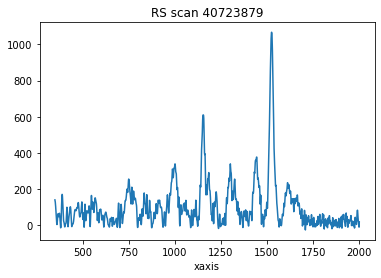

In [218]:
from pandas.core.indexes.api import Index
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
#peak selection
peaks= find_peaks(dfextract['bzero'])
scannumber=df.iloc[0,0]
scannumber=str(scannumber)
xaxis= df.iloc[0,0:]
plot = dfextract['bzero'].plot(title="RS scan "+scannumber)
default_x_ticks = range(len(df.iloc[0:,0]))
#find peaks

In [229]:
#find peaks
# positions 1526. 1325, 1156, and 747 cm-1
p1= dfextract['bzero'].loc[1526]
p1=float(p1)
p2= dfextract['bzero'].loc[1325]
p2=float(p2)
p3= dfextract['bzero'].loc[1156]
p3=float(p3)
p4= dfextract['bzero'].loc[747]
p4=float(p4)

# set peak threshold
pthreshold = input('Enter the minimum peak threshold counts ')
pthreshold= float(pthreshold)
#pass fail arguements for peak height
if p1 >= pthreshold:
  print("RS Passed peak 1 1526 cm-1 threshold")
else:
  print("RS FAILED peak 1 1526 cm-1 threshold")

if p2 >= pthreshold:
  print("RS Passed peak 2 1325 cm-1 threshold")
else:
  print("RS FAILED peak 2 1325 cm-1 threshold")

if p3 >= pthreshold:
  print("RS Passed peak 3 1156 cm-1 threshold")
else:
  print("RS FAILED peak 3 1156 cm-1 threshold")

if p4 >= pthreshold:
  print("RS Passed peak 4 747 cm-1 threshold")
else:
  print("RS FAILED peak 4 747 cm-1 threshold")


RS Passed peak 1 1526 cm-1 threshold
RS Passed peak 2 1325 cm-1 threshold
RS Passed peak 3 1156 cm-1 threshold
RS Passed peak 4 747 cm-1 threshold


PASS


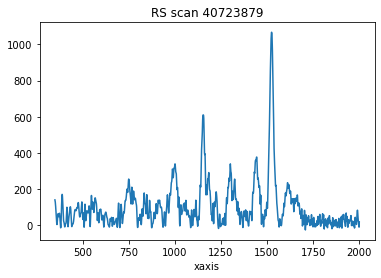

In [230]:
#Final pass fail
if ((snrt <= snrcalc) and (p1 >= pthreshold) and (p2 >= pthreshold) and (p3 >= pthreshold) and (p4 >= pthreshold)):
    print("PASS")
else:
    print("FAIL")
plot = dfextract['bzero'].plot(title="RS scan "+scannumber)